In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

In [3]:
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [4]:
df['opposition'] = df['opposition'].apply(lambda x:x[2:])

In [5]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)

In [6]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df['not_out'] 

0      0
1      0
2      1
3      0
4      0
      ..
345    1
346    1
347    0
348    0
349    0
Name: not_out, Length: 350, dtype: int32

In [7]:
df.drop(columns='odi_number' , inplace = True)

In [8]:
df_new = df.loc[((df['score'] != 'DNB' )& (df['score'] != 'TDNB' )),'runs_scored':]
print(df_new.head())

  runs_scored balls_faced strike_rate fours sixes  opposition         ground  \
0           0           1           0     0     0  Bangladesh     Chattogram   
1          12          11      109.09     2     0  Bangladesh          Dhaka   
2           7           2         350     0     1  Bangladesh          Dhaka   
3           3           7       42.85     0     0    Pakistan          Kochi   
4         148         123      120.32    15     4    Pakistan  Visakhapatnam   

        date  year  not_out  
0 2004-12-23  2004        0  
1 2004-12-26  2004        0  
2 2004-12-27  2004        1  
3 2005-04-02  2005        0  
4 2005-04-05  2005        0  


In [9]:
 df_new['runs_scored'] = df_new['runs_scored'].astype(int)
 df_new['balls_faced'] = df_new['balls_faced'].astype(int)
 df_new['strike_rate'] = df_new['strike_rate'].astype(float)
 df_new['fours'] = df_new['fours'].astype(int)
 df_new['sixes'] = df_new['sixes'].astype(int)

In [10]:
first_match_date = df['date'].dt.date.min().strftime('%B %d %Y')
print('first match :' ,first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d %Y')
print('last match :' ,last_match_date)
number_of_matches = df.shape[0]
print('Numbebr of Matches played:',number_of_matches)
number_of_inns = df_new.shape[0]
print('Numbebr of innings played:',number_of_inns)
not_outs=df_new['not_out'].sum()
print('not outs :',not_outs)
runs_scored=df_new['runs_scored'].sum()
print('runs scored in career :',runs_scored)
balls_faced=df_new['balls_faced'].sum()
print('balls faced in the career :',balls_faced)
career_sr=(runs_scored / balls_faced )*100
print('career strike rate : {:.2f}'.format(career_sr))
career_avg=(runs_scored / (number_of_inns - not_outs ))
print('career average : {:.2f}'.format(career_avg))
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(),'date'].values[0]
highest_score = df.loc[df.date == highest_score_date,'date'].values[0]
print('highest scored on date : \n',highest_score)
hundreds= df_new.loc[df_new['runs_scored'] >= 100].shape[0]
print('hundreds: ',hundreds)
fiftys= df_new.loc[(df_new['runs_scored'] >= 50) & (df_new['runs_scored'] <100)].shape[0]
print('fiftys: ',fiftys)
fours= df_new['fours'].sum()
print('fours: ',fours)
sixes= df_new['sixes'].sum()
print('sixes: ',sixes)


first match : December 23 2004
last match : July 09 2019
Numbebr of Matches played: 350
Numbebr of innings played: 297
not outs : 84
runs scored in career : 10773
balls faced in the career : 12303
career strike rate : 87.56
career average : 50.58
highest scored on date : 
 2005-10-31T00:00:00.000000000
hundreds:  10
fiftys:  73
fours:  826
sixes:  229


In [11]:
first_match_date=df['date'].dt.date.min().strftime('%B %d, %Y')
print('first match:',first_match_date)

first match: December 23, 2004


In [12]:
last_match_date=df['date'].dt.date.max().strftime('%B %d, %Y')
print('last match:',last_match_date)

last match: July 09, 2019


In [13]:
number_of_matches =df.shape[0]
print('number of  matches:',number_of_matches)

number of  matches: 350


In [14]:
number_of_inns =df_new.shape[0]
print('number of  inns:',number_of_inns)

number of  inns: 297


In [15]:

not_outs =df_new['not_out'].sum()
print('not out:',not_outs)

not out: 84


In [16]:
runs_scored = df_new['runs_scored'].sum()
print("run scored",runs_scored)


run scored 10773


In [17]:
ball_face= df_new['balls_faced'].sum()
print("run scored", ball_face)


run scored 12303


In [18]:
career_sr=(runs_scored/ball_face)*100
print(" career strike rate:{:.2f}".format(career_sr))


 career strike rate:87.56


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


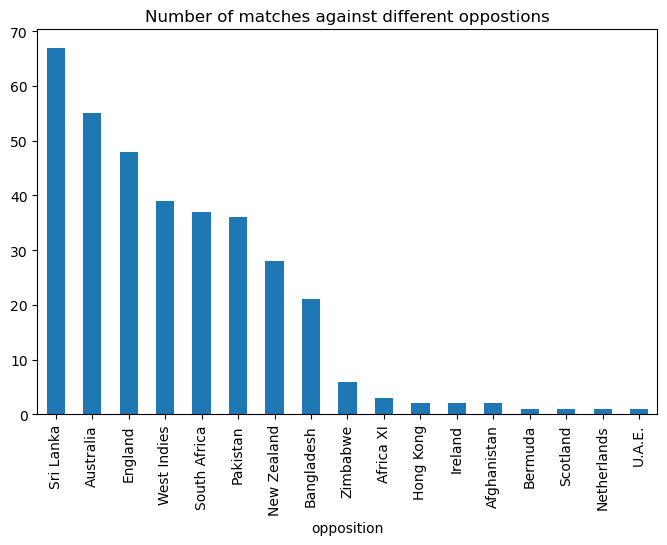

In [19]:
opposition_counts=df['opposition'].value_counts()
print(opposition_counts)
opposition_counts.plot(kind='bar', title='Number of matches against different oppostions', figsize=(8, 5))
plt.show()

In [20]:
# Run scored against each team
# Group the DataFrame by 'oppostion' column
grouped_by_opposition = df_new.groupby('opposition')

#Sum the 'runs scored' column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


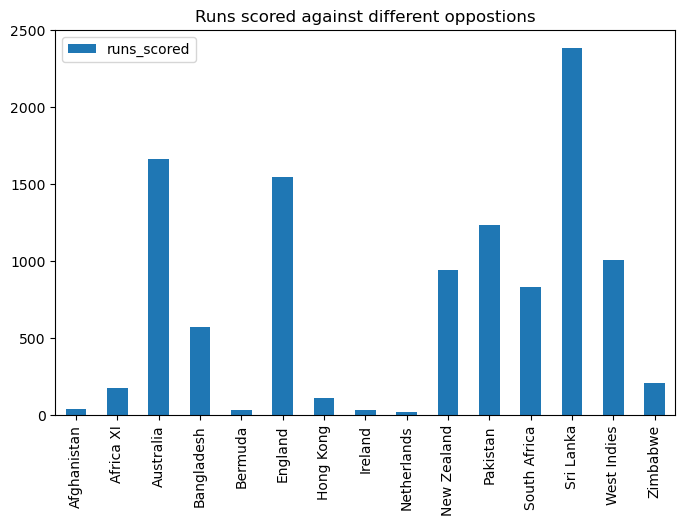

In [21]:
#sum_of_runs_scored is a Series with a labelled index, which is oppostion
# Convert it into a DataFrame and remove the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition', kind='bar', title='Runs scored against different oppostions', figsize=(8, 5))
plt.xlabel(None);
plt.show()

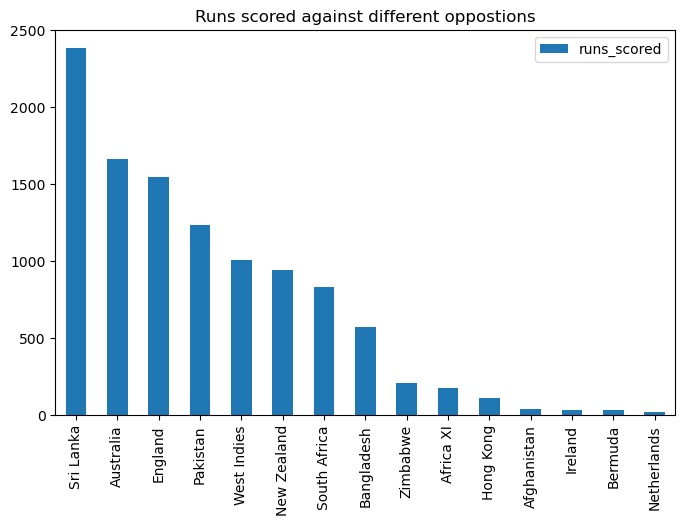

In [22]:
# Does not look good.... Let us Sort it...
sorted = runs_scored_by_opposition.sort_values(by='runs_scored', ascending=False)
sorted.plot(x='opposition', kind='bar', title='Runs scored against different oppostions', figsize=(8, 5))
plt.xlabel(None);
plt.show()

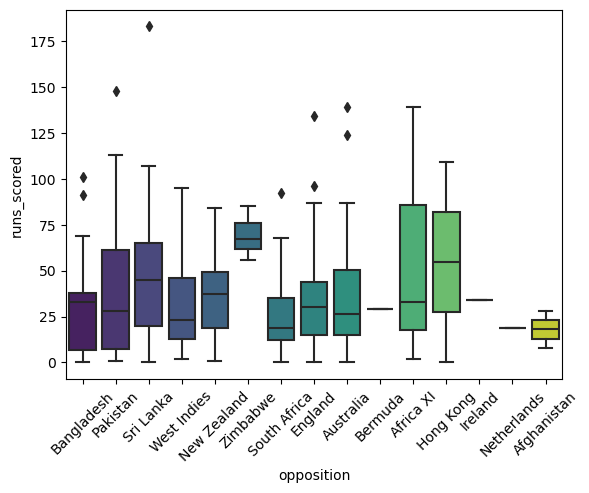

In [24]:
#Boxplot of runs against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_new, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [28]:
#Looks crowded - Let us retain only major countries
#List of oppositions to filter
opposition_list = ['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']


In [29]:
#Filter rows where 'opposition' is in the list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]


In [30]:
#Sort the filtered DataFrame is descending order of runs_scored
df_filtered = df_filtered.sort_values(by='runs_scored',ascending=False)


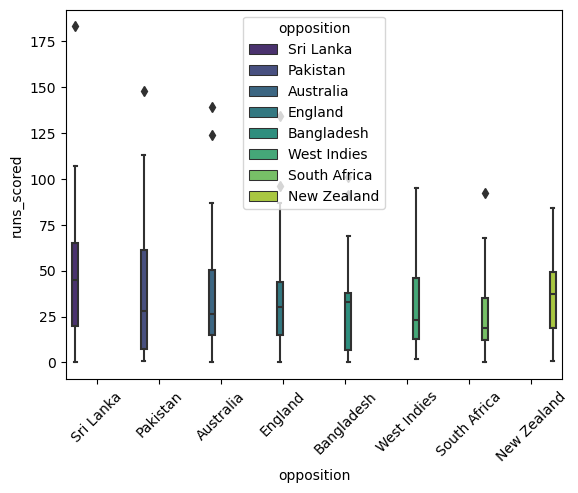

In [32]:
#Redraw boxplot but on filtered opposition  list
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered,hue='opposition',palette='viridis')
plt.xticks(rotation=45)
plt.show()

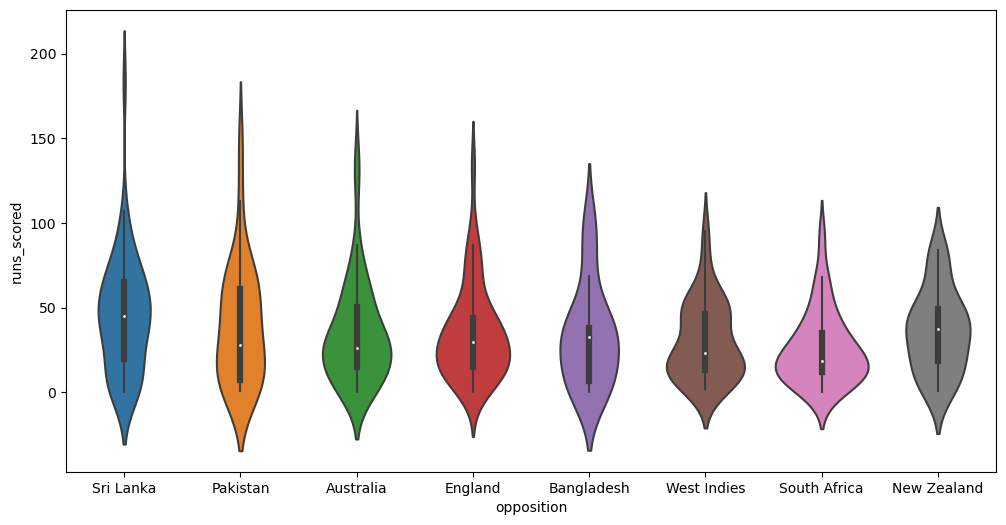

In [28]:
#violen plot
plt.figure(figsize=(12,6))
sns.violinplot(x='opposition',y='runs_scored',data=df_filtered)
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

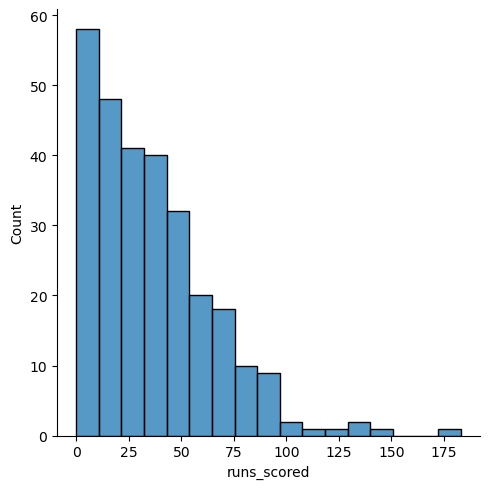

In [29]:
#distplot plot with and without KDE
plt.figure(figsize=(12,6))
sns.displot(data=df_filtered,x='runs_scored',kde=False)
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

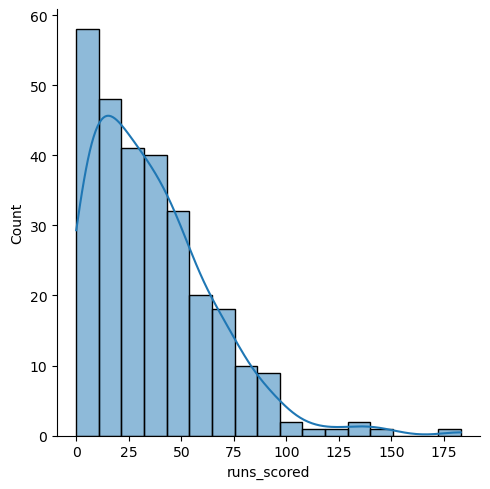

In [30]:
#distplot plot with and without KDE
plt.figure(figsize=(12,6))
sns.displot(data=df_filtered,x='runs_scored',kde=True)
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


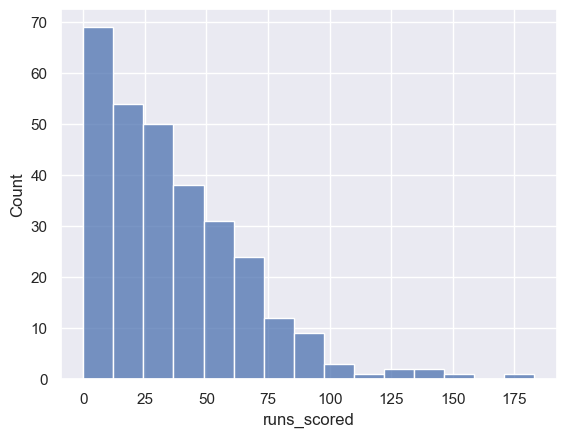

In [31]:
#histplot
sns.set(style='darkgrid')
sns.histplot(data = df_new,x='runs_scored',bins=15)
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


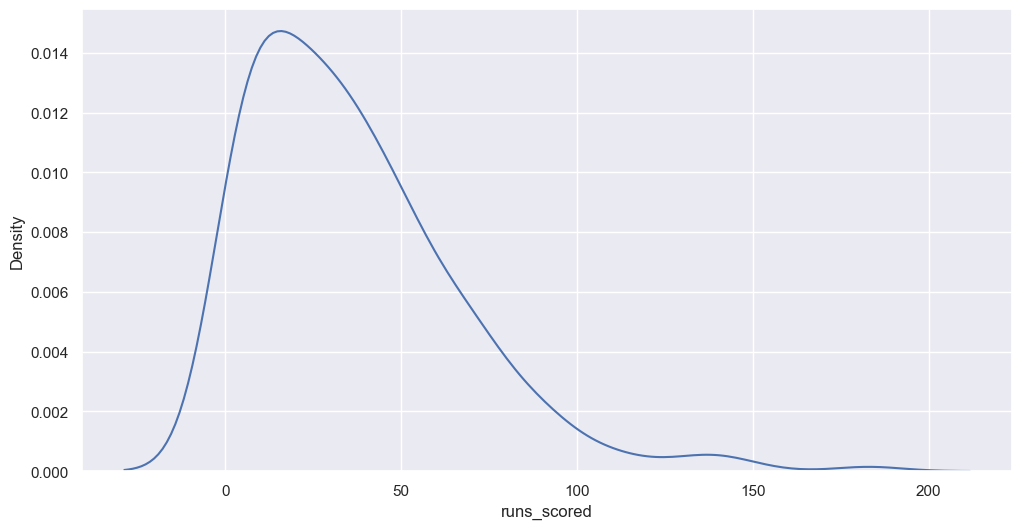

In [32]:
#KDE plot
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_new,x='runs_scored')
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


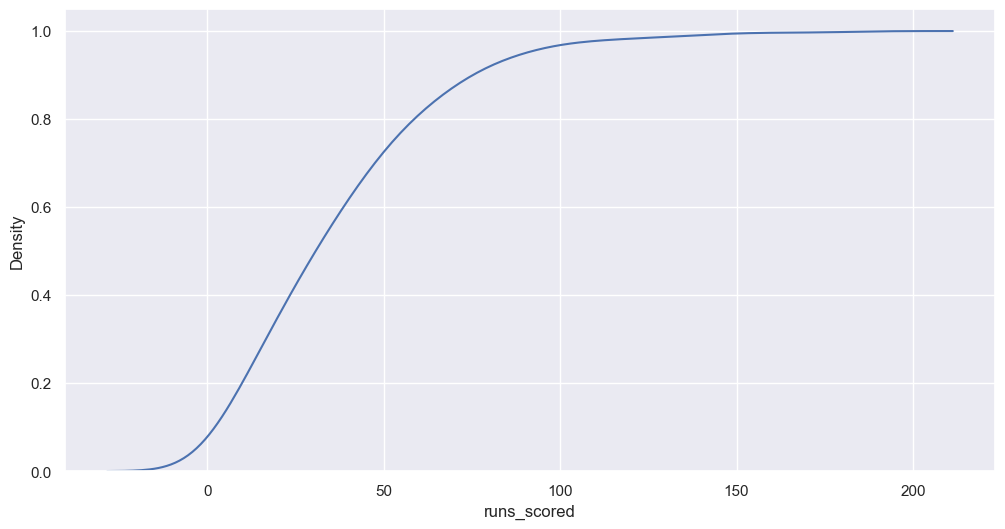

In [33]:
# KDE plot with cumulative probability
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_filtered,x='runs_scored',cumulative = True)
plt.show()

C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

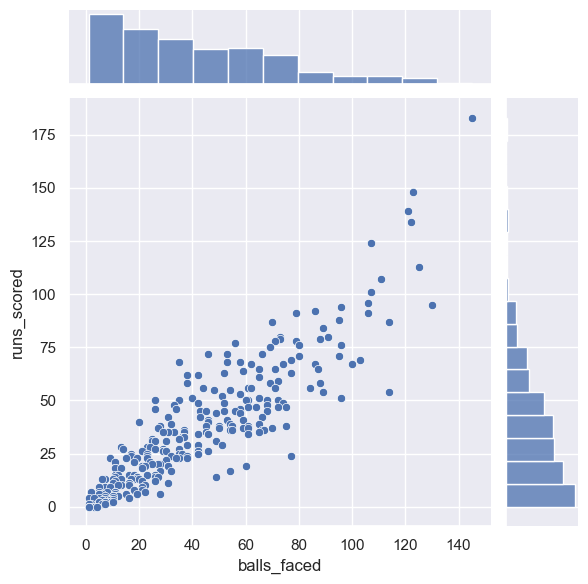

In [34]:
#jointplot
plt.figure(figsize=(12,6))
sns.jointplot(data=df_filtered,x='balls_faced',y='runs_scored',kind='scatter')
plt.show()

In [35]:
# heat map
# calculate the corelation matrix
corelation_matrix=df_new[['balls_faced','runs_scored']].corr()

<Axes: >

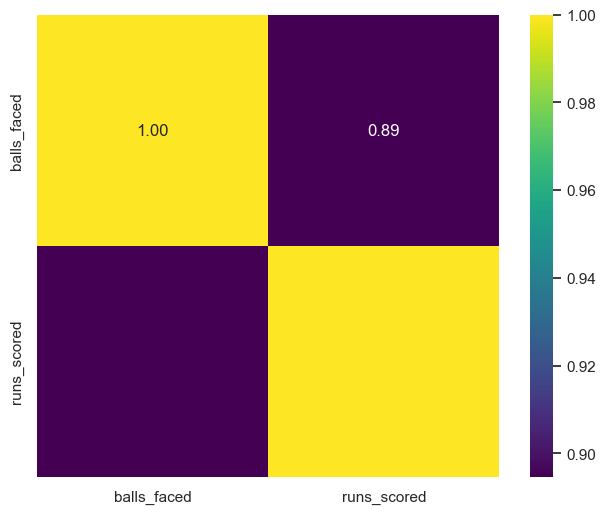

In [36]:
#create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=corelation_matrix,annot=True,cmap='viridis',square=True,fmt=".2f")

In [37]:
# calculate strike rate per opposition and show as a heat map
# Grouping by opposition
grouped_by_opposition = df_filtered.groupby('opposition')

In [38]:
# Aggregating 'balls_faced' and 'runs_scored' using sum
agg_sum = grouped_by_opposition.agg({'balls_faced': 'sum', 'runs_scored': 'sum'})

In [39]:
# Assigning the result to df_strike_rate
df_strike_rate = agg_sum

In [40]:
# Calculate strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored'] / df_strike_rate['balls_faced']) * 100

In [41]:
# Resetting index to make 'opposition' a regular column
# df_strike_rate.reset_index(inplace=True)
# NO - We do want opposition as index for heatmap to be possible
# Display the resulting DataFrame
print(df_strike_rate)

              balls_faced  runs_scored  strike_rate
opposition                                         
Australia            2052         1660    80.896686
Bangladesh            682          569    83.431085
England              1758         1546    87.940842
New Zealand          1140          940    82.456140
Pakistan             1361         1231    90.448200
South Africa          950          830    87.368421
Sri Lanka            2645         2383    90.094518
West Indies          1108         1005    90.703971


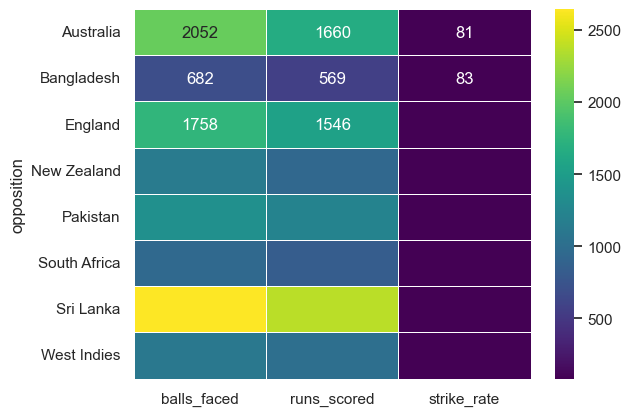

In [42]:
# Bad graph - strike rate scale is different from runs scored and balls faced
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()

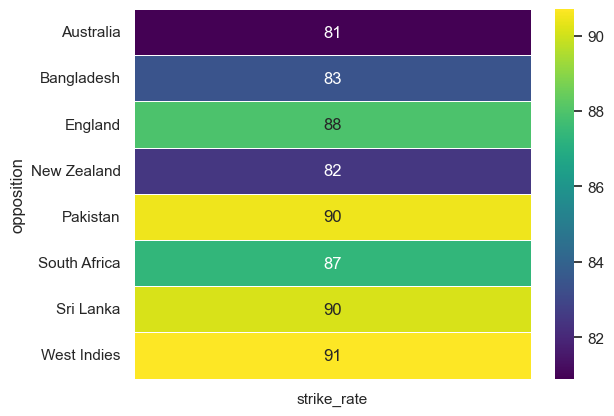

In [43]:
# Good graph - only retain strike rate column
df_strike_rate = df_strike_rate[['strike_rate']] 
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()


<BarContainer object of 8 artists>

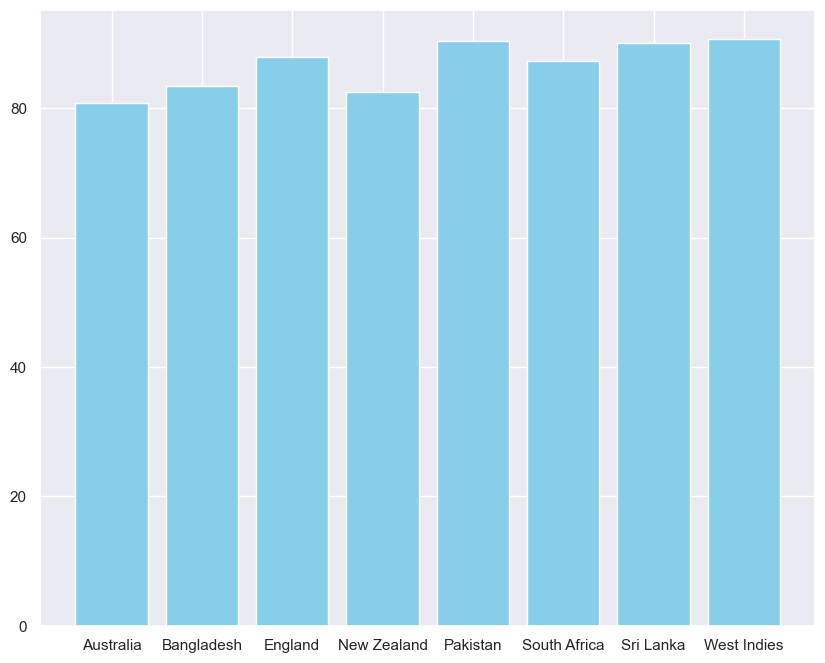

In [44]:
# Strike rate bar graph with career srike rate as a line on the bar graph
# Create the bar plot

# Resetting index to make 'opposition' a regular column
df_strike_rate.reset_index(inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(df_strike_rate['opposition'], df_strike_rate['strike_rate'], color='skyblue')

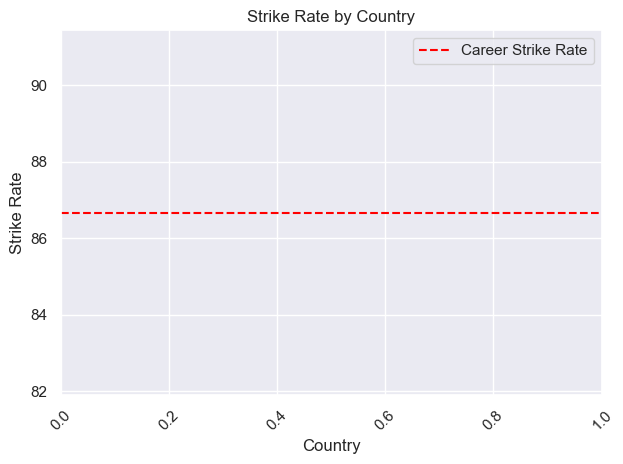

In [45]:
# Plot the aggregate strike rate as a red line
aggregate_strike_rate = df_strike_rate['strike_rate'].mean()
plt.axhline(y=aggregate_strike_rate, color='red', linestyle='--', label='Career Strike Rate')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Strike Rate')
plt.title('Strike Rate by Country')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



In [46]:
# Proportion of runs in boundaries (4s and 6s both)
# Copy only the 'runs_scored', 'fours', and 'sixes' columns into a new DataFrame
df_boundaries = df_filtered[['opposition', 'runs_scored', 'fours', 'sixes']].copy()

# Add a new column 'runs_in_boundaries' to df_boundaries
df_boundaries['runs_in_boundaries'] = (df_boundaries['fours'] * 4) + (df_boundaries['sixes'] * 6)

# Display the updated DataFrame
print(df_boundaries)

       opposition  runs_scored  fours  sixes  runs_in_boundaries
21      Sri Lanka          183     15     10                 120
4        Pakistan          148     15      4                  84
228     Australia          139     12      5                  78
284       England          134     10      6                  76
146     Australia          124      9      3                  54
..            ...          ...    ...    ...                 ...
74   South Africa            0      0      0                   0
273     Australia            0      0      0                   0
171     Australia            0      0      0                   0
223       England            0      0      0                   0
0      Bangladesh            0      0      0                   0

[284 rows x 5 columns]


In [47]:
# Selecting required columns
df_boundaries_selected = df_boundaries[['opposition', 'runs_scored', 'runs_in_boundaries']].copy()

# Grouping by 'opposition'
grouped_by_opposition = df_boundaries_selected.groupby('opposition')

# Aggregating using sum
df_boundaries_grouped = grouped_by_opposition.sum().reset_index()

# Display the new DataFrame
print(df_boundaries_grouped)

# Stacked bar plot
# Set the figure size
plt.figure(figsize=(10, 6))


     opposition  runs_scored  runs_in_boundaries
0     Australia         1660                 646
1    Bangladesh          569                 214
2       England         1546                 720
3   New Zealand          940                 412
4      Pakistan         1231                 582
5  South Africa          830                 376
6     Sri Lanka         2383                 998
7   West Indies         1005                 420


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 8 artists>

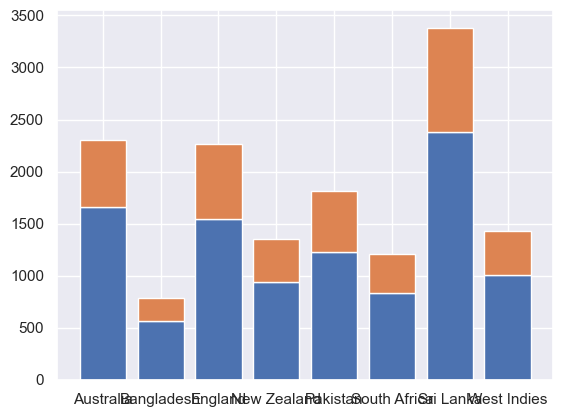

In [48]:
# Plot the stacked bar chart
plt.bar(df_boundaries_grouped['opposition'], df_boundaries_grouped['runs_scored'], label='Runs Scored')
plt.bar(df_boundaries_grouped['opposition'], df_boundaries_grouped['runs_in_boundaries'], 
        bottom=df_boundaries_grouped['runs_scored'], label='Runs in Boundaries')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


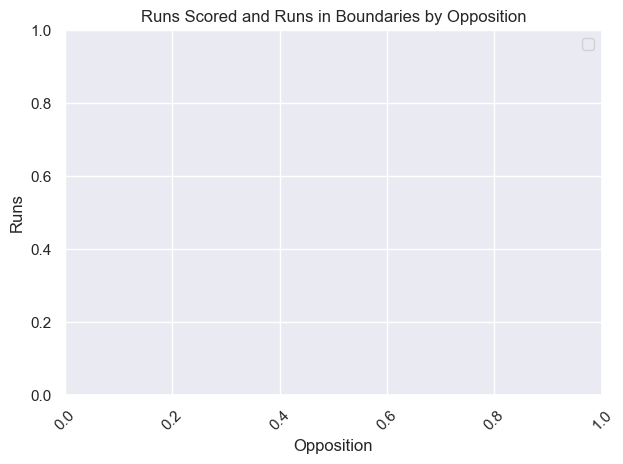

In [50]:
# Add labels and title
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs Scored and Runs in Boundaries by Opposition')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

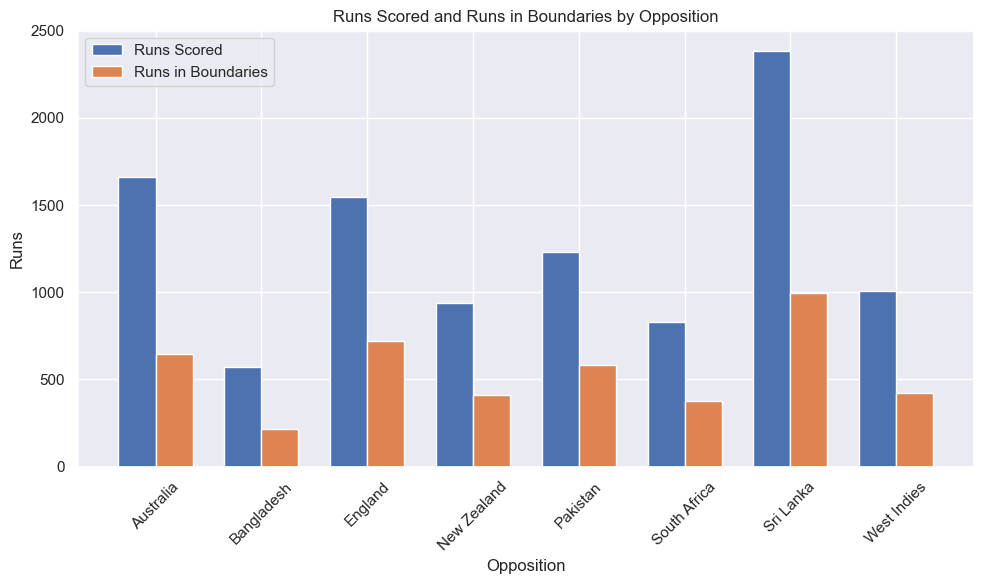

In [51]:
# Same thing - side by side bar plot
# Set the figure size
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Set the x coordinates for the groups
index = np.arange(len(df_boundaries_grouped['opposition']))

# Plot the side-by-side bar chart
plt.bar(index, df_boundaries_grouped['runs_scored'], width=bar_width, label='Runs Scored')
plt.bar(index + bar_width, df_boundaries_grouped['runs_in_boundaries'], 
        width=bar_width, label='Runs in Boundaries')

# Add labels and title
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs Scored and Runs in Boundaries by Opposition')
plt.xticks(index + bar_width / 2, df_boundaries_grouped['opposition'], rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


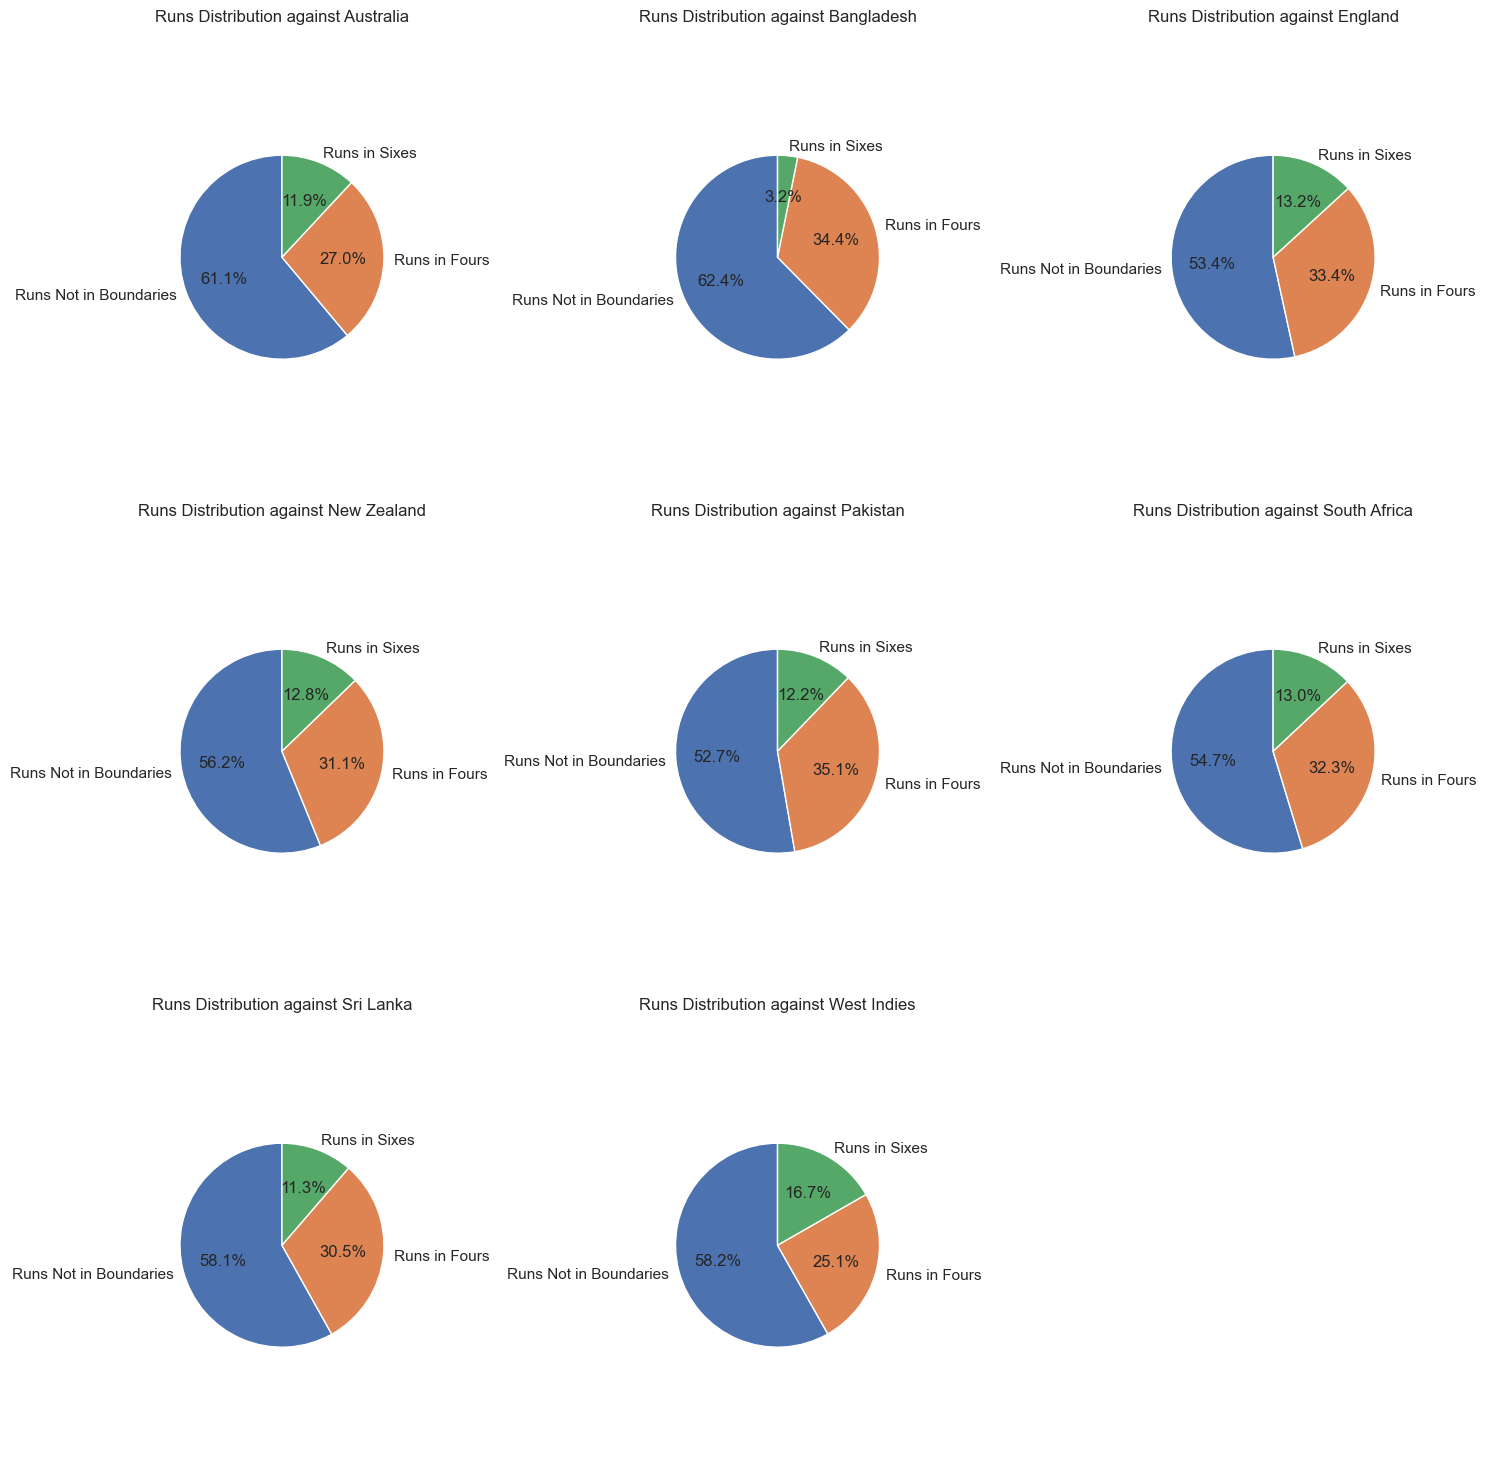

In [52]:
# Now a pie chart
# Add columns 'runs_in_fours' and 'runs_in_sixes' to df_boundaries
df_boundaries['runs_in_fours'] = df_boundaries['fours'] * 4
df_boundaries['runs_in_sixes'] = df_boundaries['sixes'] * 6
df_boundaries['runs_not_in_boundaries'] = df_boundaries['runs_scored'] - df_boundaries['runs_in_fours'] - df_boundaries['runs_in_sixes']

# Selecting required columns
df_boundaries_selected = df_boundaries[['opposition', 'runs_not_in_boundaries', 'runs_in_fours', 'runs_in_sixes']].copy()

# Grouping by 'opposition'
grouped_by_opposition = df_boundaries_selected.groupby('opposition')

# Aggregating using sum
df_boundaries_grouped = grouped_by_opposition.sum().reset_index()

import math

# Calculate the number of oppositions
num_oppositions = len(df_boundaries_grouped)

# Determine the number of rows and columns
# ceil() rounds up to the nearest integer, e.g. ceil(3.3) = 4
num_cols = math.ceil(math.sqrt(num_oppositions))
num_rows = math.ceil(num_oppositions / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Iterate over each opposition
for i, (index, row) in enumerate(df_boundaries_grouped.iterrows()):
    # Extract opposition and runs data
    opposition = row['opposition']
    runs_data = [row['runs_not_in_boundaries'], row['runs_in_fours'], row['runs_in_sixes']]
    
    # Create pie chart
    axes[i].pie(runs_data, labels=['Runs Not in Boundaries', 'Runs in Fours', 'Runs in Sixes'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Runs Distribution against {opposition}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Remove any extra subplots
for j in range(num_oppositions, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

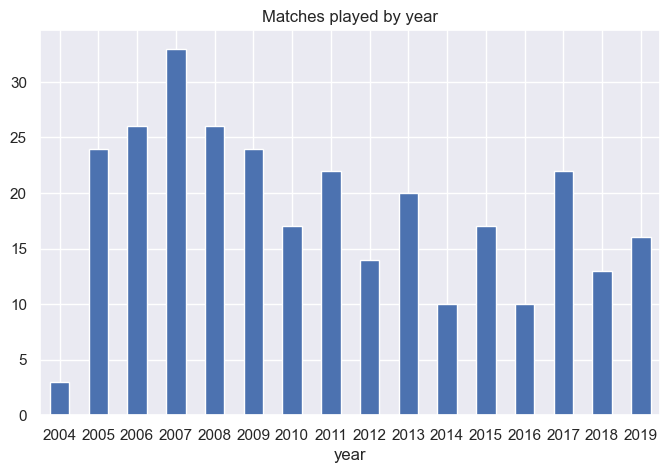

In [53]:
# Year-wise record
#df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
# Count the occurrences of each unique value in the 'year' column
year_counts = df_new['year'].value_counts()
# Sort the counted values by index (year)
sorted_counts = year_counts.sort_index()
# Plot the sorted counts as a bar plot
sorted_counts.plot(kind='bar', title='Matches played by year', figsize=(8, 5))

plt.xticks(rotation=0)
plt.show()

    year  runs_scored
0   2004           19
1   2005          895
2   2006          821
3   2007         1103
4   2008         1097
5   2009         1198
6   2010          600
7   2011          764
8   2012          524
9   2013          753
10  2014          418
11  2015          640
12  2016          278
13  2017          788
14  2018          275
15  2019          600


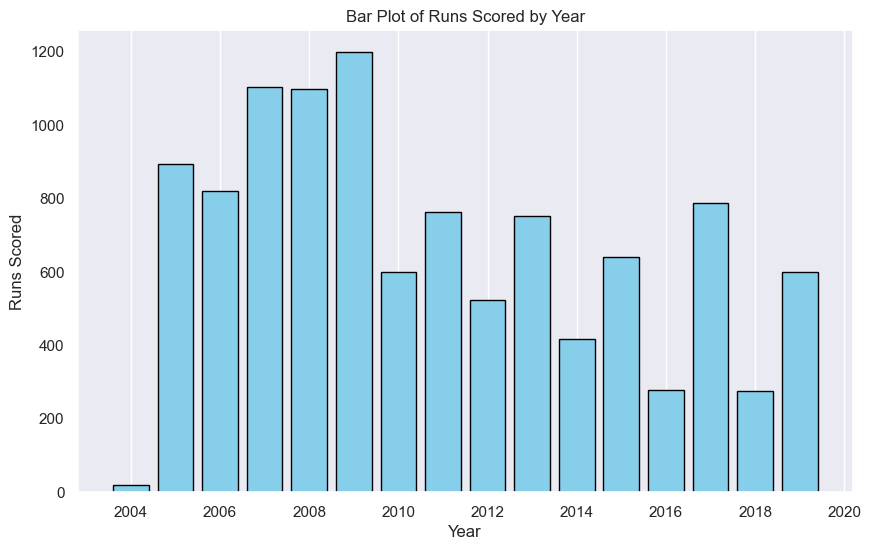

In [54]:
# Runs scored by year
# Group the DataFrame by 'year'
# Group the DataFrame by 'year'
grouped_by_year = df_new.groupby('year')
#print(df.dtypes)
#print(grouped_by_year.dtypes)
# Save the DataFrame to a CSV file
#df.to_csv('grouped_by_year.csv', index=False)

# Convert the 'runs_scored' column to integer
#df['runs_scored'] = df['runs_scored'].astype(int)

# Calculate the sum of 'runs_scored' for each year
sum_of_runs_scored = grouped_by_year['runs_scored'].sum()

# Reset the index to make 'year' a regular column
df_grouped = sum_of_runs_scored.reset_index()
print(df_grouped)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
x_values = df_grouped['year']
y_values = df_grouped['runs_scored']
plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
plt.title('Bar Plot of Runs Scored by Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(axis='y')
plt.show()




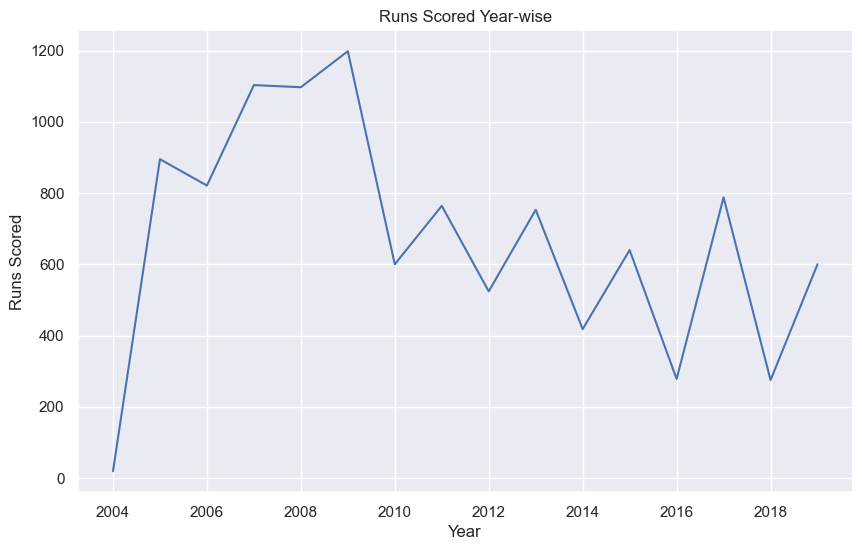

In [55]:
# As a line plot
plt.figure(figsize=(10, 6))
x_values = df_grouped['year']
y_values = df_grouped['runs_scored']
plt.plot(x_values, y_values, linestyle='-', color='b')
plt.title('Runs Scored Year-wise')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()

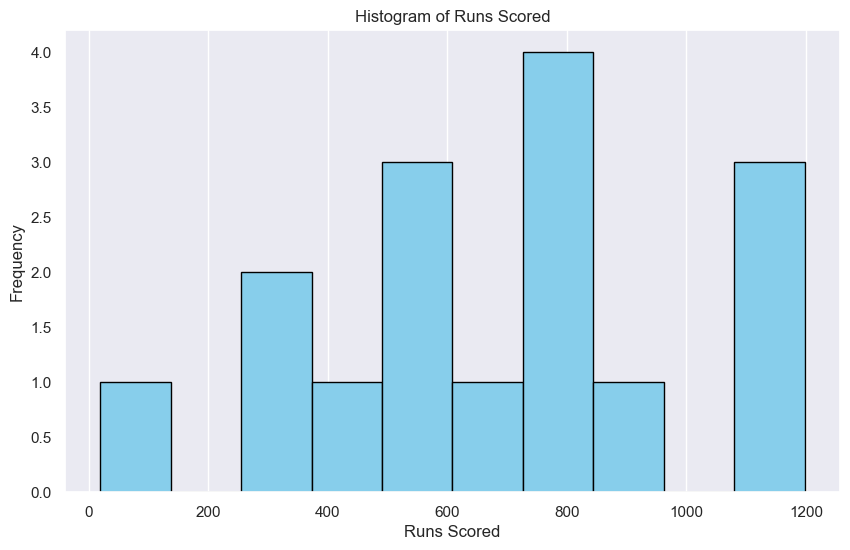

In [56]:
# As a histogram to show frequency - not year-by-year performance
plt.figure(figsize=(10, 6))
data = df_grouped['runs_scored']
num_bins = 10
plt.hist(data, bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

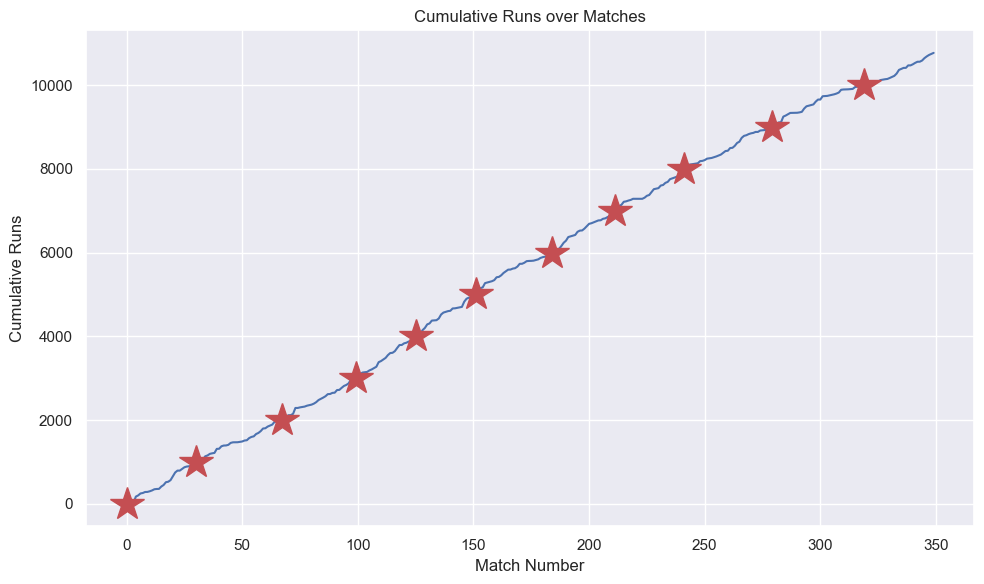

In [57]:

# Cumulative score progress
# Calculate the cumulative runs
df_new['cumulative_runs'] = df_new['runs_scored'].cumsum()

# Plot the cumulative runs as a line graph
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['cumulative_runs'], linestyle='-')

# Mark each 1000th cumulative runs milestone with a red dot
# Iterate over a range of values from 0 up to the maximum value of the 
#   'cumulative_runs' column in the DataFrame df_new, with a step of 1000
for milestone in range(0, df_new['cumulative_runs'].max() + 1, 1000):
    # Find the index closest to the milestone
    # Subtract the milestone from each value in the 'cumulative_runs' column, 
    #   taking the absolute value, and then finding the index corresponding to 
    #   the minimum absolute difference using the idxmin() method    
    index = (df_new['cumulative_runs'] - milestone).abs().idxmin()
    # plot a red dot at that index and the milestone value using the 
    #   plt.plot() function ... r = red, 0 = circle ... also try r*
    # plt.plot(index, milestone, 'ro')
    plt.plot(index, milestone, 'r*', markersize=25)
    
# Add labels and title
plt.xlabel('Match Number')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs over Matches')

# Show plot
plt.tight_layout()
plt.show()



       opposition  runs_scored  balls_faced  fours  sixes
21      Sri Lanka          183          145     15     10
4        Pakistan          148          123     15      4
228     Australia          139          121     12      5
284       England          134          122     10      6
146     Australia          124          107      9      3
..            ...          ...          ...    ...    ...
74   South Africa            0            4      0      0
273     Australia            0            3      0      0
171     Australia            0            1      0      0
223       England            0            4      0      0
0      Bangladesh            0            1      0      0

[284 rows x 5 columns]


C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

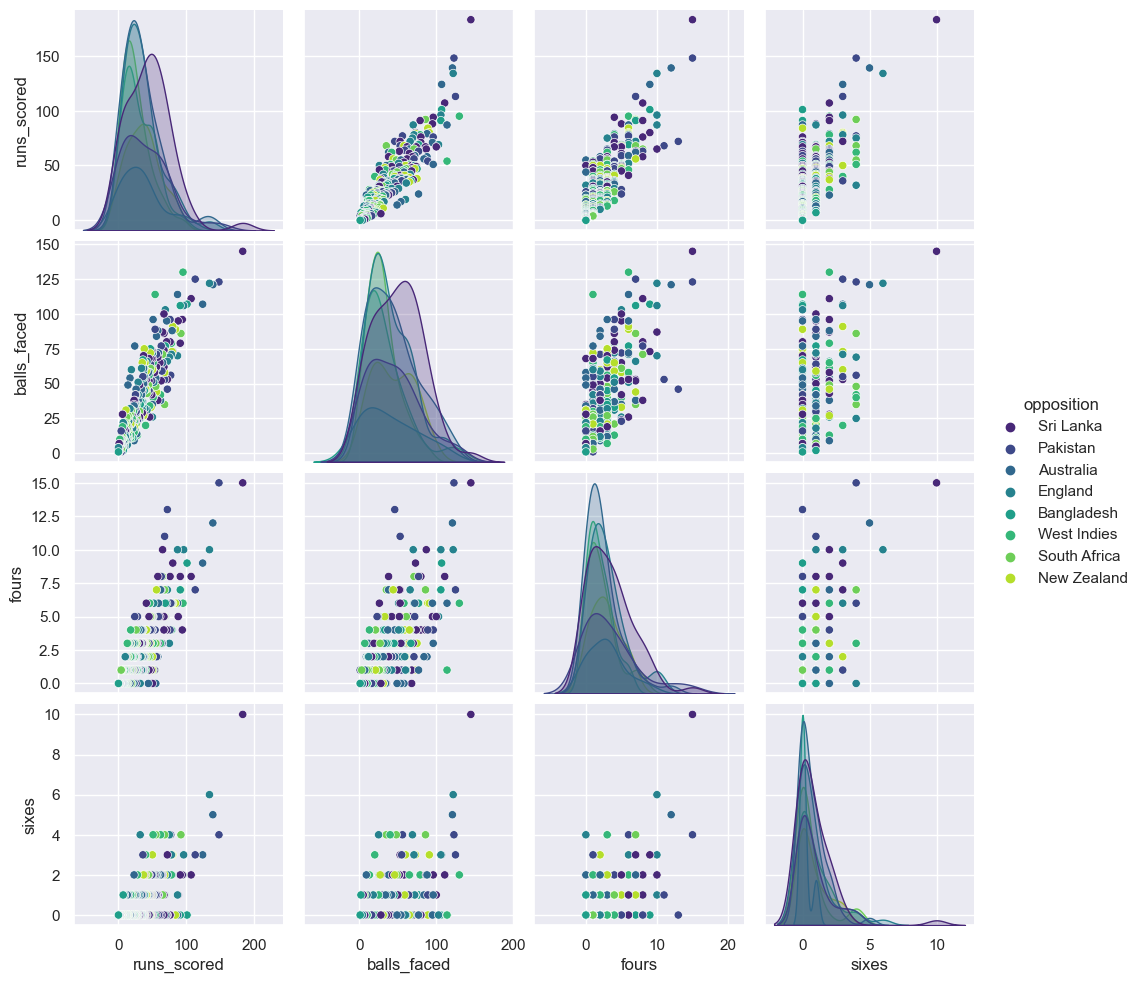

In [58]:
# Pair plots

# Only retain needed columns
df_pair_plot = df_filtered[['opposition', 'runs_scored', 'balls_faced', 'fours', 'sixes']]
print(df_pair_plot)

sns.pairplot(df_pair_plot,hue='opposition',palette='viridis')
plt.show()


C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

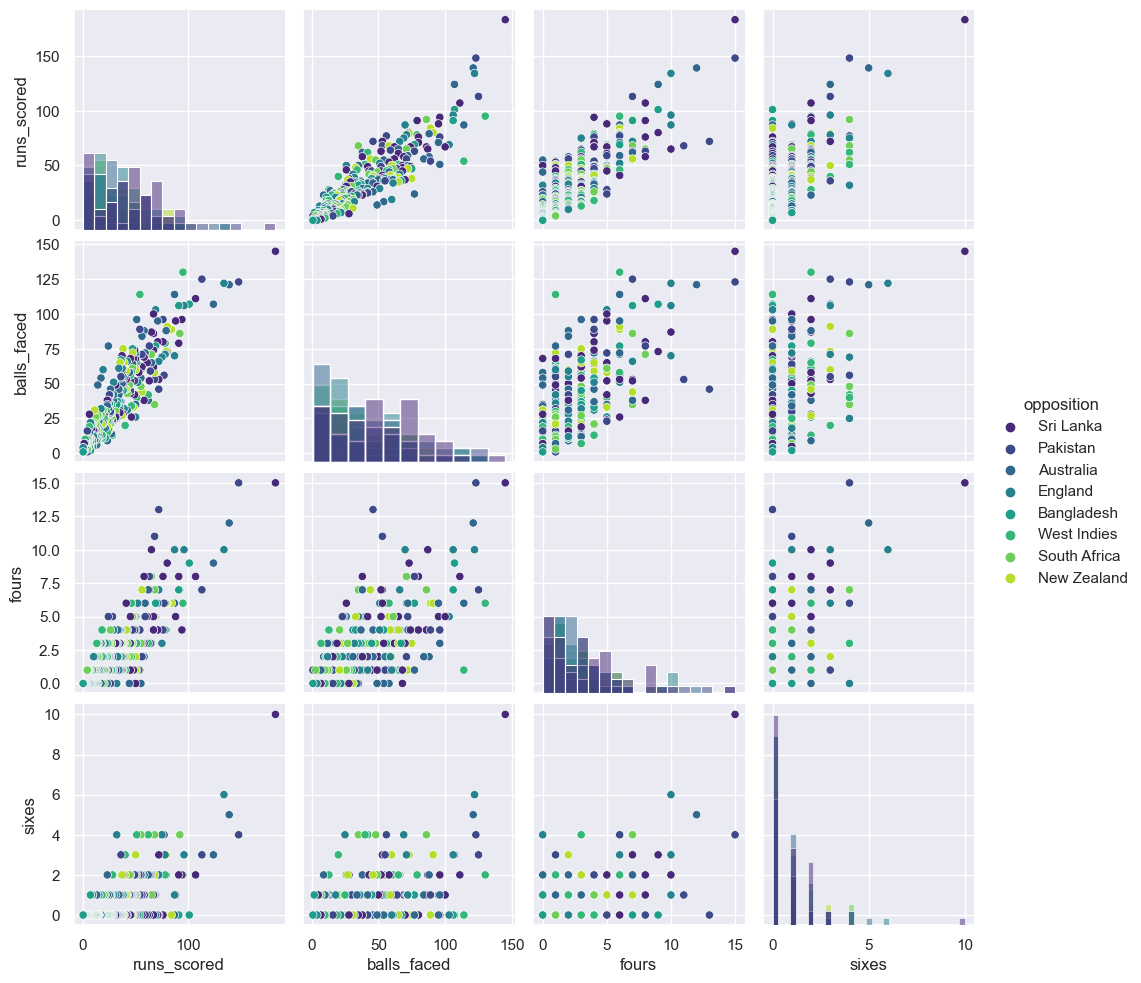

In [59]:
# Interpretation: The diagonals show the distribution of a single variable
#  eg runs_scored, balls_faced, ...
#  The scatter plots on the upper and lower triangles show the relationship 
#   (or lack thereof) between two variables
#   For example, the left-most plot in the second row shows the scatter plot of 
#   runs_scored versus balls_faced
# We can also see correlation: runs_scored is highly correlated with  balls_faced
#   Runs_scored is also correlated positively to fours

# View histograms in diagonals
sns.pairplot(df_pair_plot,hue='opposition',palette='viridis',diag_kind='hist')
plt.show()